# Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
# Load the dataset
df = pd.read_csv("bank-full.csv")

In [3]:
# Diasplay the loaded dataset
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
# Check the missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
# Data Types and Missing Values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Data Preprocessing:

In [7]:
# Encode the target variable
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])

In [8]:
# Select features and target
X = df.drop('y', axis=1)
y = df['y']

In [9]:
# One-hot encode categorical features
X = pd.get_dummies(X)

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
# Predict on the test set
y_pred = clf.predict(X_test)

### Model Evaluation:

In [13]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8732721441999336


### Visualization:

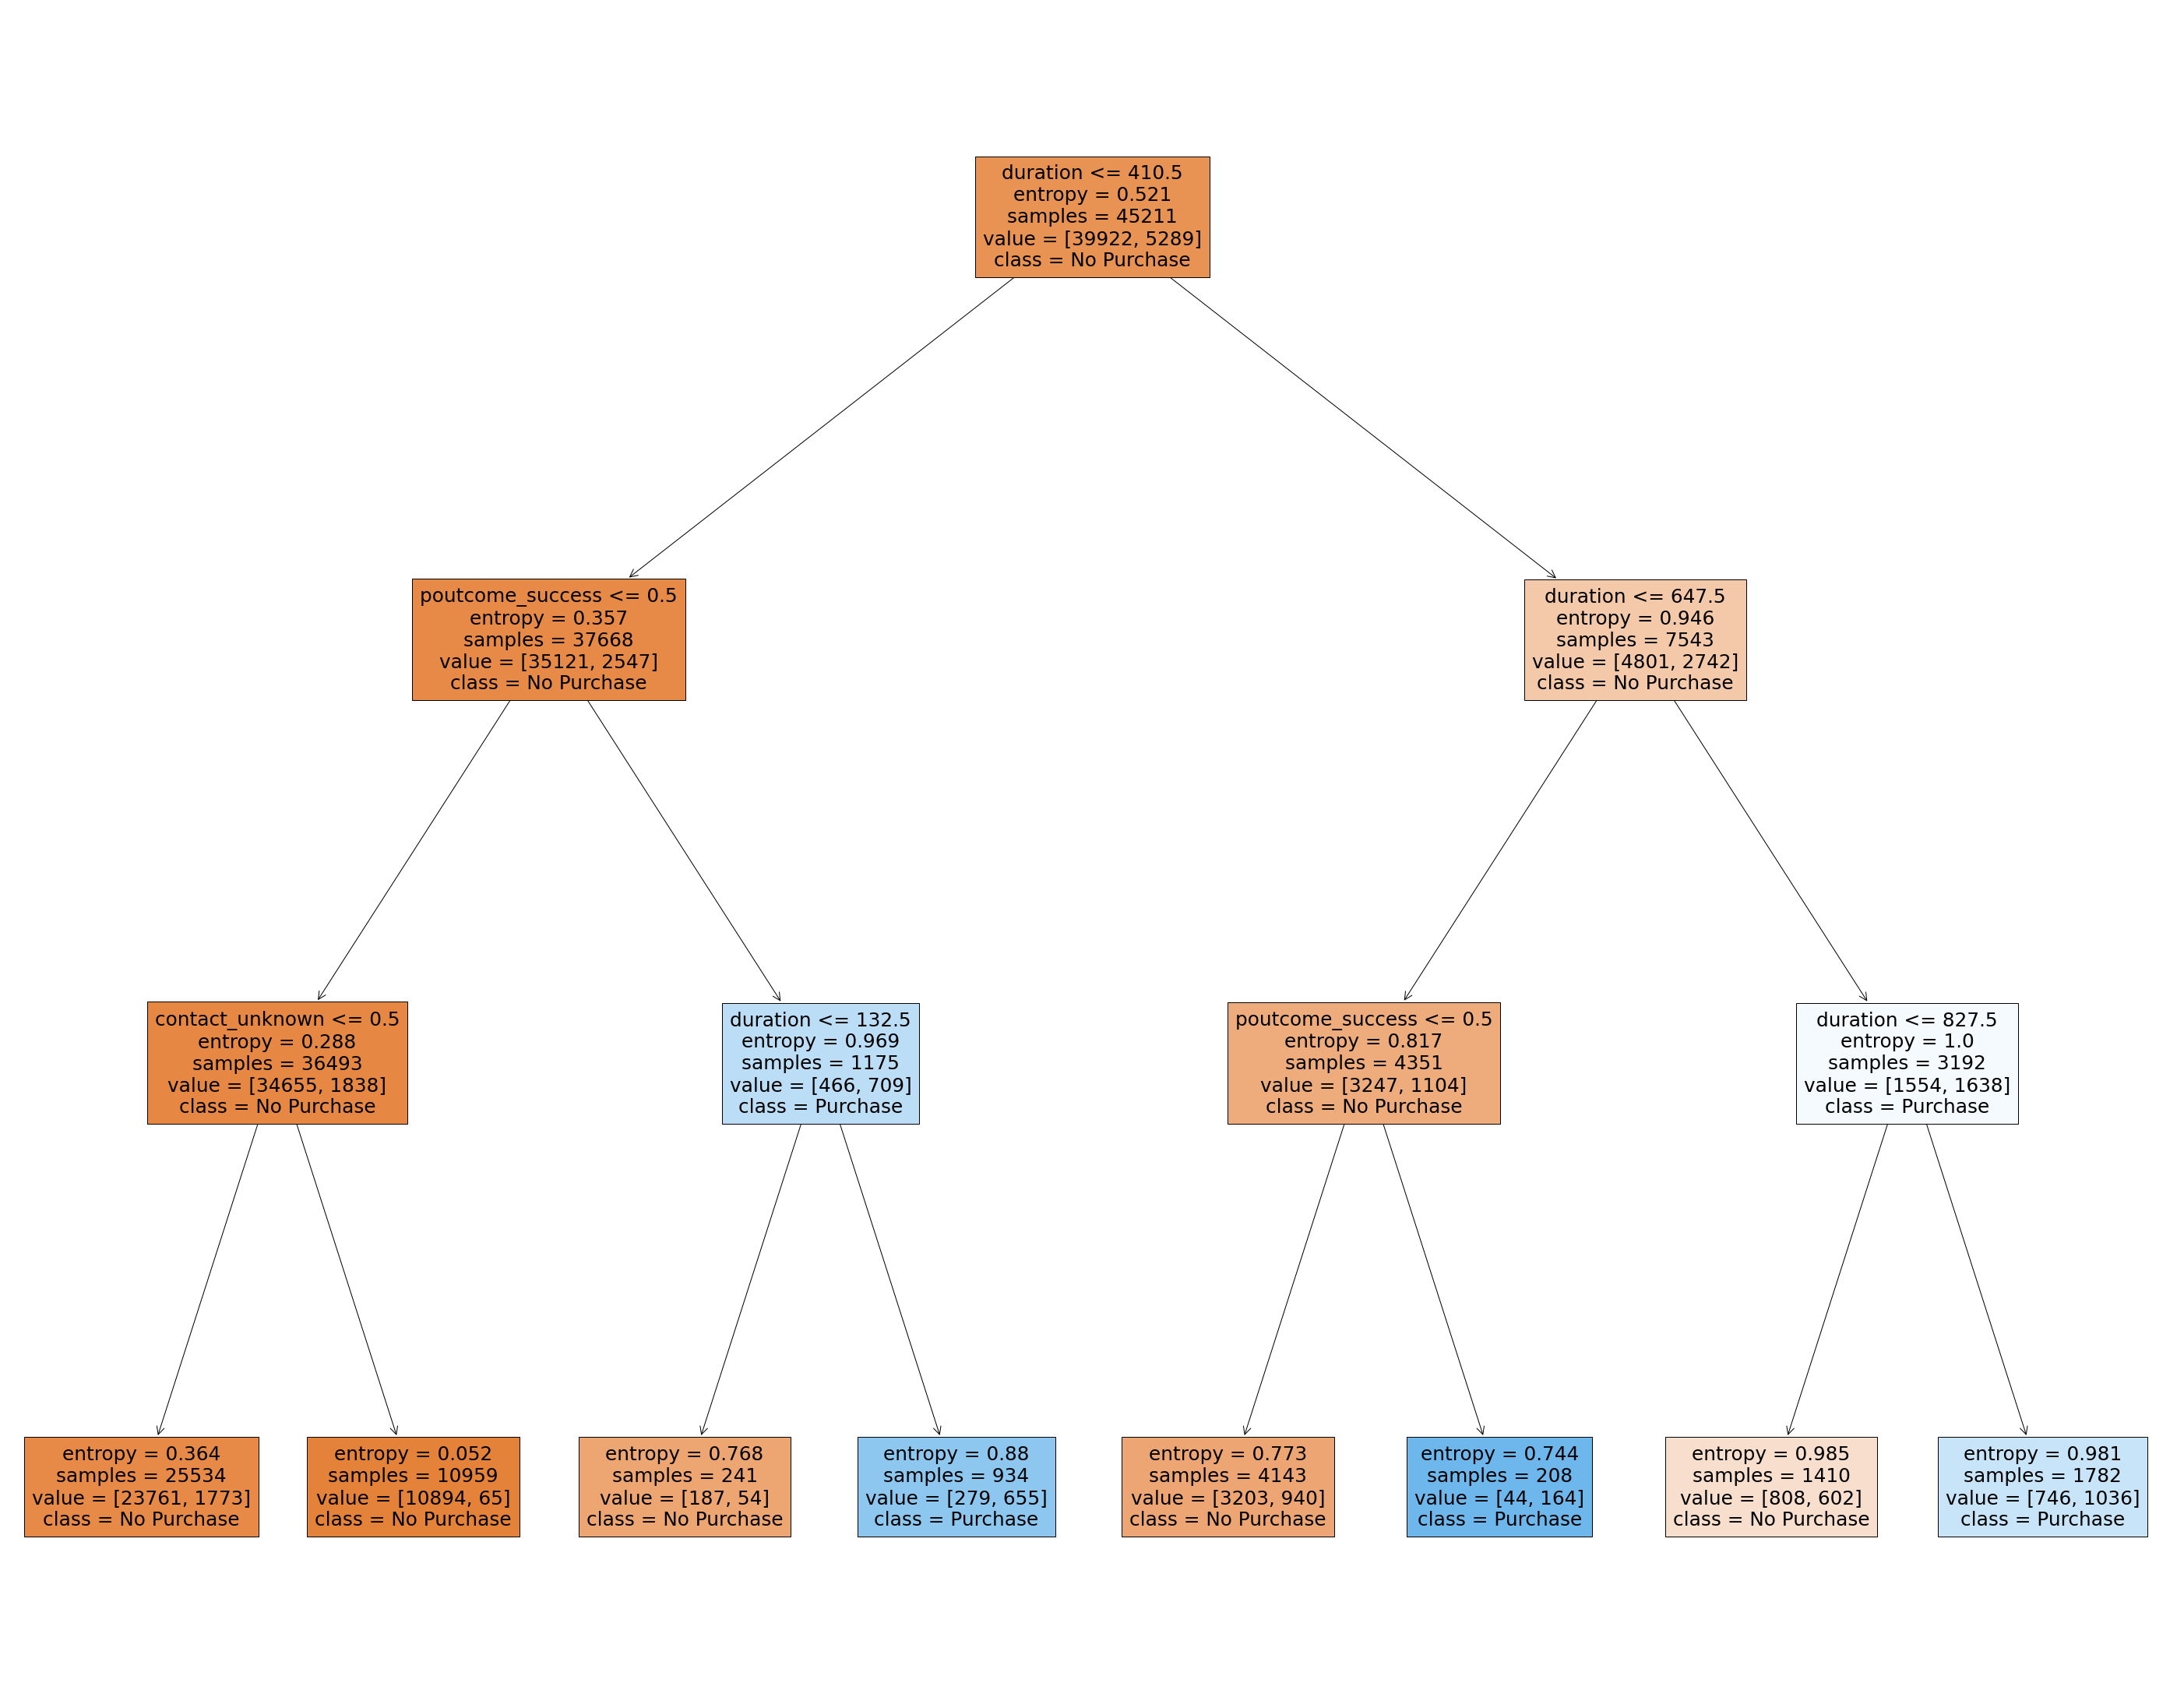

In [14]:
dtree = DecisionTreeClassifier(criterion="entropy",random_state = 100, max_depth=3,min_samples_leaf=5)
dtree = dtree.fit(X,y)

plt.figure(figsize=(50,40))
tree.plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['No Purchase', 'Purchase'])
plt.show()

### Conclusion

A Decision Tree Classifier was trained using the preprocessed data to predict whether a customer will make a purchase (binary classification).

Model Evaluation:
The model's performance was evaluated using accuracy as the metric, resulting in getting 0.87 accuracy on the test set.

Visualization:
The decision tree was visualized to provide insights into the model's decision-making process.

Insights:
The important features that influence the prediction, providing a clear understanding of the key factors in customer's purchase decisions
In conclusion, the decision tree model offers a practical approach to predict customer purchases based on demographic and behavioral data.